# Importing libraries

In [1]:
import pandas as pd
import numpy as np
from nltk.tokenize import RegexpTokenizer
import re
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier  
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression  
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report
import seaborn as sns

# Loading data from  schema

In [2]:
dataset = pd.ExcelFile('fact_table.xlsx')
sentiment_table = dataset.parse(sheet_name='Sentiment')
dataset = dataset.parse(sheet_name='Fact',usecols=['feedback','sentiment_id'])
dataset = pd.merge(dataset, sentiment_table, on='sentiment_id', how='left')

del dataset['sentiment_id']
dataset

,feedback,sentiment
0,deffective item seller not professional wrong ...,Negative
1,walang dumating gantong item,Negative
2,damaged defective item,Negative
3,wlang nalabas co buti diy diffuser,Negative
4,basag poyung dumating aquaspeed order ibang br...,Negative
...,...,...
4056,goods item well packed mabilis ship dumating a...,Positive
4057,second time ordering shop packed well items no...,Positive
4058,excellent quality,Positive
4059,excellent quality,Positive


# Model without oversampling

# Splitting dataset to train & test

In [3]:
y = dataset['sentiment']
x = dataset['feedback']

In [4]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)


In [5]:
cv = CountVectorizer(ngram_range=(1,2),min_df=1)


In [6]:
train_vec = cv.fit_transform(x_train)
print(train_vec)

  (0, 3099)	1
  (0, 10925)	1
  (0, 3105)	1
  (1, 12016)	1
  (1, 8691)	1
  (1, 11359)	1
  (1, 12148)	1
  (1, 8725)	1
  (2, 10438)	1
  (2, 9436)	1
  (2, 10441)	1
  (3, 6768)	2
  (3, 2789)	1
  (3, 5126)	1
  (3, 13400)	1
  (3, 5069)	1
  (3, 3708)	1
  (3, 9665)	1
  (3, 3766)	1
  (3, 6062)	3
  (3, 7738)	1
  (3, 7720)	1
  (3, 2468)	1
  (3, 13910)	1
  (3, 819)	1
  :	:
  (3247, 3928)	1
  (3247, 148)	1
  (3247, 9539)	1
  (3247, 4675)	1
  (3247, 10729)	1
  (3247, 14901)	1
  (3247, 14400)	1
  (3247, 1378)	1
  (3247, 2254)	1
  (3247, 9600)	1
  (3247, 1379)	1
  (3247, 4687)	1
  (3247, 5307)	1
  (3247, 15069)	1
  (3247, 11995)	1
  (3247, 11997)	1
  (3247, 4388)	1
  (3247, 14734)	1
  (3247, 10749)	1
  (3247, 1811)	1
  (3247, 4391)	1
  (3247, 14411)	1
  (3247, 15072)	1
  (3247, 14903)	1
  (3247, 2255)	1


In [7]:
test_vec = cv.transform(x_test)
print(test_vec)

  (0, 5126)	1
  (0, 5209)	1
  (0, 8691)	1
  (0, 8725)	1
  (0, 8895)	1
  (0, 8961)	1
  (0, 11359)	1
  (0, 12016)	1
  (0, 12148)	1
  (1, 4864)	1
  (1, 5126)	1
  (1, 5230)	1
  (1, 12398)	1
  (1, 12406)	1
  (2, 7255)	1
  (2, 7257)	1
  (2, 13640)	1
  (3, 27)	1
  (3, 31)	1
  (3, 587)	1
  (3, 596)	1
  (3, 1794)	1
  (3, 1845)	1
  (3, 2102)	1
  (3, 2103)	1
  :	:
  (812, 6688)	1
  (812, 6712)	1
  (812, 7339)	1
  (812, 7340)	1
  (812, 7546)	1
  (812, 7548)	1
  (812, 8211)	1
  (812, 8216)	1
  (812, 8628)	1
  (812, 8653)	1
  (812, 9718)	1
  (812, 9719)	1
  (812, 9834)	1
  (812, 10603)	1
  (812, 10605)	1
  (812, 10628)	1
  (812, 10629)	1
  (812, 10729)	1
  (812, 10743)	1
  (812, 12016)	1
  (812, 12121)	1
  (812, 12640)	1
  (812, 13564)	1
  (812, 14953)	1
  (812, 14968)	1


# Multinomial Naive Bayes (Imbalanced data)

In [8]:
naive = MultinomialNB()
naive.fit(train_vec,y_train)
naive_pred=naive.predict(test_vec)

In [9]:
mnv_imbalanced =pd.DataFrame(data = x_test)
mnv_imbalanced['Actual'] = y_test
mnv_imbalanced['Predicted'] = naive_pred
mnv_imbalanced

,feedback,Actual,Predicted
121,item ok seller not responsive,Negative,Negative
3905,item shipped immediately,Positive,Positive
2555,many thanks,Positive,Positive
2128,items arrived good condition without damages e...,Positive,Positive
1489,thank seller,Positive,Positive
...,...,...,...
1022,excellent quality accommodating seller well pa...,Positive,Positive
3677,items working good condition thank seller,Positive,Positive
2185,ok salamat,Positive,Positive
1590,excellent quality well packaged,Positive,Positive


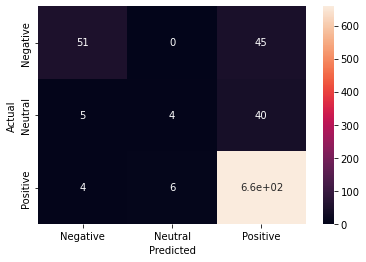

In [10]:
confusion_matrix = pd.crosstab(mnv_imbalanced['Actual'], mnv_imbalanced['Predicted'], rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
plt.show()

In [11]:
naive_accuracy = accuracy_score(y_test,naive_pred)
naive_precision = precision_score(y_test,naive_pred,average='macro')
naive_recall = recall_score(y_test,naive_pred,average='macro')
naive_f1 = f1_score(y_test,naive_pred,average='macro')

# Decision Tree (Imbalanced data)

In [12]:
decision_tree= DecisionTreeClassifier()
decision_tree.fit(train_vec,y_train)
tree_pred = decision_tree.predict(test_vec)

In [13]:
dt_imbalanced =pd.DataFrame(data = x_test)
dt_imbalanced['Actual'] = y_test
dt_imbalanced['Predicted'] = tree_pred
dt_imbalanced


,feedback,Actual,Predicted
121,item ok seller not responsive,Negative,Negative
3905,item shipped immediately,Positive,Positive
2555,many thanks,Positive,Positive
2128,items arrived good condition without damages e...,Positive,Positive
1489,thank seller,Positive,Positive
...,...,...,...
1022,excellent quality accommodating seller well pa...,Positive,Positive
3677,items working good condition thank seller,Positive,Positive
2185,ok salamat,Positive,Positive
1590,excellent quality well packaged,Positive,Positive


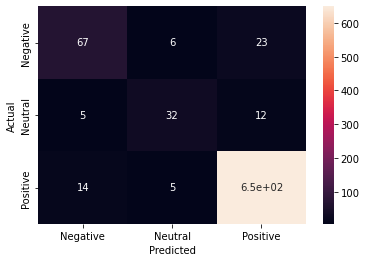

In [14]:
confusion_matrix = pd.crosstab(dt_imbalanced['Actual'], dt_imbalanced['Predicted'], rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
plt.show()

In [15]:
tree_accuracy = accuracy_score(y_test,tree_pred)
tree_precision = precision_score(y_test,tree_pred,average='macro')
tree_recall = recall_score(y_test,tree_pred,average='macro')
tree_f1 = f1_score(y_test,tree_pred,average='macro')

# SVM (Imbalanced data)

In [16]:
svm= SVC()  
svm.fit(train_vec,y_train)  
svm_pred = svm.predict(test_vec)

In [17]:
svm_imbalanced =pd.DataFrame(data = x_test)
svm_imbalanced['Actual'] = y_test
svm_imbalanced['Predicted'] = svm_pred
svm_imbalanced


,feedback,Actual,Predicted
121,item ok seller not responsive,Negative,Negative
3905,item shipped immediately,Positive,Positive
2555,many thanks,Positive,Positive
2128,items arrived good condition without damages e...,Positive,Positive
1489,thank seller,Positive,Positive
...,...,...,...
1022,excellent quality accommodating seller well pa...,Positive,Positive
3677,items working good condition thank seller,Positive,Positive
2185,ok salamat,Positive,Positive
1590,excellent quality well packaged,Positive,Positive


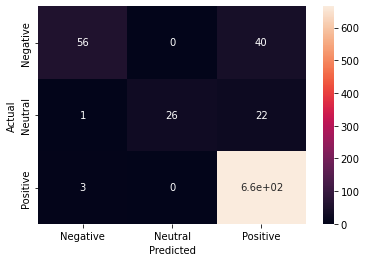

In [18]:
confusion_matrix = pd.crosstab(svm_imbalanced['Actual'], svm_imbalanced['Predicted'], rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
plt.show()

In [19]:
svc_accuracy = accuracy_score(y_test,svm_pred)
svc_precision = precision_score(y_test,svm_pred,average='macro')
svc_recall = recall_score(y_test,svm_pred,average='macro')
svc_f1 = f1_score(y_test,svm_pred,average='macro')

# MLR (Imbalanced data)

In [20]:
logistic= LogisticRegression(multi_class='multinomial')  
logistic.fit(train_vec,y_train)  
logistic_pred= logistic.predict(test_vec)

In [21]:
mlr_imbalanced =pd.DataFrame(data = x_test)
mlr_imbalanced['Actual'] = y_test
mlr_imbalanced['Predicted'] = logistic_pred
mlr_imbalanced


,feedback,Actual,Predicted
121,item ok seller not responsive,Negative,Negative
3905,item shipped immediately,Positive,Positive
2555,many thanks,Positive,Positive
2128,items arrived good condition without damages e...,Positive,Positive
1489,thank seller,Positive,Positive
...,...,...,...
1022,excellent quality accommodating seller well pa...,Positive,Positive
3677,items working good condition thank seller,Positive,Positive
2185,ok salamat,Positive,Positive
1590,excellent quality well packaged,Positive,Positive


In [22]:
logistic_accuracy = accuracy_score(y_test,logistic_pred)
logistic_precision = precision_score(y_test,logistic_pred,average='macro')
logistic_recall = recall_score(y_test,logistic_pred,average='macro')
logistic_f1 = f1_score(y_test,logistic_pred,average='macro')

# Model metrics (Imbalanced)

In [23]:
model_metrics = {'Model': ['Multinomial Naive Bayes','Decision Tree', 'Support Vector Machine', 'Multinomial Logistic Regression'], 'Accuracy Score':[naive_accuracy,tree_accuracy,svc_accuracy,logistic_accuracy],'Precision':[naive_precision, tree_precision, svc_precision, logistic_precision],'Recall':[naive_recall,tree_recall,svc_recall,logistic_recall],'F1 Score':[naive_f1,tree_f1,svc_f1,logistic_f1]}

model_metrics = pd.DataFrame(data= model_metrics)
model_metrics

,Model,Accuracy Score,Precision,Recall,F1 Score
0,Multinomial Naive Bayes,0.876999,0.711866,0.532638,0.574037
1,Decision Tree,0.920049,0.824029,0.774178,0.797325
2,Support Vector Machine,0.918819,0.949350,0.703152,0.788229
3,Multinomial Logistic Regression,0.927429,0.895372,0.748984,0.807997


# Model with Oversampling

# Splitting dataset to train & test

In [24]:
y = dataset['sentiment']
x = dataset['feedback']


In [25]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)


In [26]:
training_data = pd.DataFrame(x_train)

training_data['sentiment'] = y_train
training_data

,feedback,sentiment
2837,good buy,Positive
283,wala masabi item seller lang problema kasi mab...,Negative
1352,product works fine thank seller,Positive
1979,happy thankful online selling platforms like e...,Positive
3351,different picture still works,Positive
...,...,...
1603,excellent quality accommodating seller well pa...,Positive
2550,star product package verygood courier damaged ...,Positive
537,ok quality,Neutral
1220,matibay product,Positive


In [27]:
negative_count_training= training_data['sentiment'].value_counts()['Negative']
positive_count_training= training_data['sentiment'].value_counts()['Positive']
neutral_count_training= training_data['sentiment'].value_counts()['Neutral']


negative_count_training

366

In [28]:
neutral_count_training

155

In [29]:
positive_count_training

2727

# Oversampling after splitting 

In [30]:
positive = training_data[training_data['sentiment']=='Positive']
negative = training_data[training_data['sentiment']=='Negative']
neutral = training_data[training_data['sentiment']=='Neutral']


neutral = neutral.sample(n=len(positive), random_state=101, replace=True)
negative = negative.sample(n=len(positive), random_state=101, replace=True)

training_data = pd.concat([positive,negative,neutral],axis=0)

In [31]:
training_data

,feedback,sentiment
2837,good buy,Positive
1352,product works fine thank seller,Positive
1979,happy thankful online selling platforms like e...,Positive
3351,different picture still works,Positive
2441,well packed walang gusot delivery salamat sana...,Positive
...,...,...
409,item shipped time,Neutral
577,ok quality standard packaging,Neutral
482,item shipped time,Neutral
468,item shipped time,Neutral


In [32]:
y_train = training_data['sentiment']
x_train = training_data['feedback']

In [33]:
cv = CountVectorizer(ngram_range=(1,2),min_df=1)


In [34]:
train_vec = cv.fit_transform(x_train)
print(train_vec)

  (0, 3898)	1
  (0, 1394)	1
  (0, 3900)	1
  (1, 10676)	1
  (1, 14946)	1
  (1, 3372)	1
  (1, 13607)	1
  (1, 12063)	1
  (1, 10772)	1
  (1, 14949)	1
  (1, 3381)	1
  (1, 13659)	1
  (2, 1394)	1
  (2, 12063)	1
  (2, 4318)	1
  (2, 13682)	1
  (2, 9096)	1
  (2, 12308)	1
  (2, 10431)	1
  (2, 6445)	2
  (2, 3089)	1
  (2, 13939)	1
  (2, 3875)	1
  (2, 10775)	1
  (2, 11505)	1
  :	:
  (8180, 13791)	1
  (8180, 7423)	1
  (8180, 7421)	1
  (8180, 4859)	1
  (8180, 5092)	1
  (8180, 6624)	1
  (8180, 4063)	1
  (8180, 13116)	1
  (8180, 2110)	1
  (8180, 12861)	1
  (8180, 6597)	1
  (8180, 1640)	1
  (8180, 2595)	1
  (8180, 1601)	1
  (8180, 8380)	1
  (8180, 1241)	1
  (8180, 1602)	1
  (8180, 13792)	1
  (8180, 7424)	1
  (8180, 6141)	1
  (8180, 7422)	1
  (8180, 9963)	1
  (8180, 4860)	1
  (8180, 5093)	1
  (8180, 6201)	1


In [35]:
cv.get_feature_names()

C:\Users\R\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['aagawan',
 'aagawan cla',
 'aakalain',
 'aakalain mong',
 'aantay',
 'aantay response',
 'aapela',
 'aapela seller',
 'aareh',
 'aareh aquarium',
 'abcdefghijklmnopqrstuvwxyz',
 'abit',
 'abit late',
 'able',
 'able make',
 'able use',
 'abot',
 'abot leeg',
 'acceptable',
 'acceptable not',
 'accessories',
 'accessories filter',
 'accessories good',
 'accidentally',
 'accidentally broke',
 'accommodating',
 'accommodating replying',
 'accommodating selled',
 'accommodating seller',
 'accommodating using',
 'accomodating',
 'accomodating order',
 'accomodating satisfied',
 'accomodating seller',
 'accomodation',
 'accomodation seller',
 'according',
 'according epbi',
 'accordingly',
 'accordingly function',
 'account',
 'account grabeay',
 'account hndi',
 'acct',
 'acct eto',
 'accurate',
 'accurate happy',
 'accurate proper',
 'accurate thou',
 'acid',
 'acid not',
 'across',
 'across thank',
 'acrylic',
 'acrylic holder',
 'action',
 'action fault',
 'activa',
 'activa better',
 

In [36]:
cv.vocabulary_

{'good': 3898,
 'buy': 1394,
 'good buy': 3900,
 'product': 10676,
 'works': 14946,
 'fine': 3372,
 'thank': 13607,
 'seller': 12063,
 'product works': 10772,
 'works fine': 14949,
 'fine thank': 3381,
 'thank seller': 13659,
 'happy': 4318,
 'thankful': 13682,
 'online': 9096,
 'selling': 12308,
 'platforms': 10431,
 'like': 6445,
 'exist': 3089,
 'times': 13939,
 'going': 3875,
 'products': 10775,
 'risky': 11505,
 'glad': 3837,
 'things': 13763,
 'want': 14662,
 'click': 1652,
 'away': 679,
 'bought': 1153,
 'nice': 8493,
 'items': 5227,
 'transacted': 14054,
 'kind': 5757,
 'legit': 6369,
 'sellers': 12302,
 'got': 4027,
 'paid': 9761,
 'thanks': 13688,
 'happy thankful': 4337,
 'thankful online': 13684,
 'online selling': 9099,
 'selling platforms': 12309,
 'platforms like': 10432,
 'like exist': 6449,
 'exist times': 3090,
 'times like': 13943,
 'like going': 6450,
 'going buy': 3876,
 'buy products': 1409,
 'products risky': 10794,
 'risky glad': 11506,
 'glad things': 3841,
 't

# Bag of Words

In [37]:
bag_of_words = pd.DataFrame(train_vec.toarray(), columns=cv.get_feature_names())
bag_of_words

,aagawan,aagawan cla,aakalain,aakalain mong,aantay,aantay response,aapela,aapela seller,aareh,aareh aquarium,...,yyyyyyyyyyyyooooooooooooouuuuuuuuu,yyyyyyyyyyyyooooooooooooouuuuuuuuu nice,zero,zero marks,zip,zip pouch,zipper,zipper mabilis,zipper safely,ùuuuuuuuuuuu
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8176,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8177,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8178,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8179,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
test_vec = cv.transform(x_test)
print(test_vec)

  (0, 99)	1
  (0, 414)	1
  (0, 3567)	1
  (0, 3898)	1
  (0, 4222)	1
  (0, 4224)	1
  (0, 8445)	1
  (0, 8449)	1
  (0, 10676)	1
  (0, 10700)	1
  (0, 11775)	1
  (0, 13856)	1
  (1, 3074)	1
  (1, 3079)	1
  (1, 4828)	1
  (1, 5095)	1
  (1, 5199)	1
  (1, 9422)	1
  (1, 9433)	1
  (1, 10967)	1
  (1, 11043)	1
  (1, 12448)	1
  (1, 12457)	1
  (1, 14743)	1
  (1, 14767)	1
  :	:
  (811, 13224)	1
  (811, 13226)	1
  (811, 14139)	1
  (811, 14152)	1
  (811, 14169)	1
  (811, 14170)	1
  (811, 14321)	1
  (811, 14322)	1
  (812, 1572)	1
  (812, 1573)	1
  (812, 2024)	1
  (812, 3684)	1
  (812, 5082)	1
  (812, 6693)	1
  (812, 6736)	1
  (812, 7311)	1
  (812, 8650)	1
  (812, 8665)	1
  (812, 10676)	1
  (812, 11250)	1
  (812, 11257)	1
  (812, 11940)	1
  (812, 12063)	1
  (812, 12271)	1
  (812, 13607)	1


# Multinomial Naive Bayes (Balanced data)

In [39]:
naive = MultinomialNB()
naive.fit(train_vec,y_train)
naive_pred=naive.predict(test_vec)

In [40]:
mnv_balanced =pd.DataFrame(data = x_test)
mnv_balanced['Actual'] = y_test
mnv_balanced['Predicted'] = naive_pred
mnv_balanced


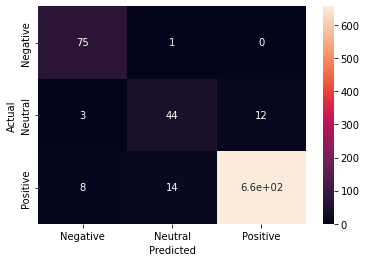

In [41]:
confusion_matrix = pd.crosstab(mnv_balanced['Actual'], mnv_balanced['Predicted'], rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
plt.show()

In [42]:
negative= mnv_balanced['Predicted'].value_counts()['Negative']
positive= mnv_balanced['Predicted'].value_counts()['Positive']
neutral= mnv_balanced['Predicted'].value_counts()['Neutral']


In [43]:
negative

86

In [44]:
positive

668

In [45]:
neutral

59

In [46]:
naive_accuracy = accuracy_score(y_test,naive_pred)
naive_precision = precision_score(y_test,naive_pred,average='macro')
naive_recall = recall_score(y_test,naive_pred,average='macro')
naive_f1 = f1_score(y_test,naive_pred,average='macro')

# Decision Tree (Balanced data)

In [47]:
decision_tree= DecisionTreeClassifier()
decision_tree.fit(train_vec,y_train)
tree_pred = decision_tree.predict(test_vec)

In [48]:
dt_balanced =pd.DataFrame(data = x_test)
dt_balanced['Actual'] = y_test
dt_balanced['Predicted'] = tree_pred
dt_balanced

,feedback,Actual,Predicted
2373,sana freebies next time hahaha anyway product ...,Positive,Positive
1657,excellent quality well packaged item shipped i...,Positive,Positive
3707,nice thermometer temp sensitive thank seller n...,Positive,Positive
1337,damage item basag tagal shipment buti ngawan k...,Negative,Negative
1123,napakamura napakalaki ganda product mabilis si...,Positive,Positive
...,...,...,...
1144,well packaged item shipped immediately,Positive,Positive
3434,aqua soil d lang sure premium ba since di pack...,Positive,Positive
1375,item packaged neatly delivery time right sched...,Positive,Positive
314,ayaw umakyat tubig tulungan buhos naubos oras ...,Negative,Negative


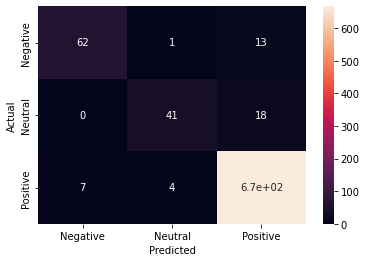

In [49]:
confusion_matrix = pd.crosstab(dt_balanced['Actual'], dt_balanced['Predicted'], rownames=['Actual'], colnames=['Predicted'])


sns.heatmap(confusion_matrix, annot=True)
plt.show()

In [50]:
tree_accuracy = accuracy_score(y_test,tree_pred)
tree_precision = precision_score(y_test,tree_pred,average='macro')
tree_recall = recall_score(y_test,tree_pred,average='macro')
tree_f1 = f1_score(y_test,tree_pred,average='macro')

In [51]:
negative= dt_balanced['Predicted'].value_counts()['Negative']
positive= dt_balanced['Predicted'].value_counts()['Positive']
neutral= dt_balanced['Predicted'].value_counts()['Neutral']


In [52]:
negative

69

In [53]:
positive

698

In [54]:
neutral

46

# SVM (Balanced data)

In [55]:
svm= SVC()  
svm.fit(train_vec,y_train)  
svm_pred = svm.predict(test_vec)

In [56]:
svm_balanced =pd.DataFrame(data = x_test)
svm_balanced['Actual'] = y_test
svm_balanced['Predicted'] = svm_pred
svm_balanced


,feedback,Actual,Predicted
2373,sana freebies next time hahaha anyway product ...,Positive,Positive
1657,excellent quality well packaged item shipped i...,Positive,Positive
3707,nice thermometer temp sensitive thank seller n...,Positive,Positive
1337,damage item basag tagal shipment buti ngawan k...,Negative,Negative
1123,napakamura napakalaki ganda product mabilis si...,Positive,Positive
...,...,...,...
1144,well packaged item shipped immediately,Positive,Positive
3434,aqua soil d lang sure premium ba since di pack...,Positive,Positive
1375,item packaged neatly delivery time right sched...,Positive,Positive
314,ayaw umakyat tubig tulungan buhos naubos oras ...,Negative,Negative


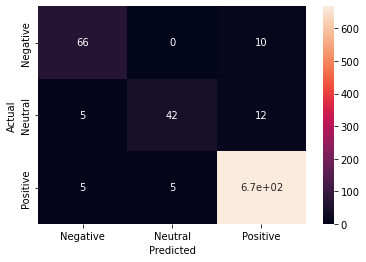

In [57]:
confusion_matrix = pd.crosstab(svm_balanced['Actual'], svm_balanced['Predicted'], rownames=['Actual'], colnames=['Predicted'])


sns.heatmap(confusion_matrix, annot=True)
plt.show()

In [58]:
svc_accuracy = accuracy_score(y_test,svm_pred)
svc_precision = precision_score(y_test,svm_pred,average='macro')
svc_recall = recall_score(y_test,svm_pred,average='macro')
svc_f1 = f1_score(y_test,svm_pred,average='macro')

# MLR (Balanced data)

In [59]:
logistic= LogisticRegression(multi_class='multinomial')  
logistic.fit(train_vec,y_train)  

LogisticRegression(multi_class='multinomial')

In [60]:
logistic_pred= logistic.predict(test_vec)


In [61]:
mlr_balanced =pd.DataFrame(data = x_test)
mlr_balanced['Actual'] = y_test
mlr_balanced['Predicted'] = logistic_pred
mlr_balanced


,feedback,Actual,Predicted
2373,sana freebies next time hahaha anyway product ...,Positive,Positive
1657,excellent quality well packaged item shipped i...,Positive,Positive
3707,nice thermometer temp sensitive thank seller n...,Positive,Positive
1337,damage item basag tagal shipment buti ngawan k...,Negative,Negative
1123,napakamura napakalaki ganda product mabilis si...,Positive,Positive
...,...,...,...
1144,well packaged item shipped immediately,Positive,Positive
3434,aqua soil d lang sure premium ba since di pack...,Positive,Positive
1375,item packaged neatly delivery time right sched...,Positive,Positive
314,ayaw umakyat tubig tulungan buhos naubos oras ...,Negative,Negative


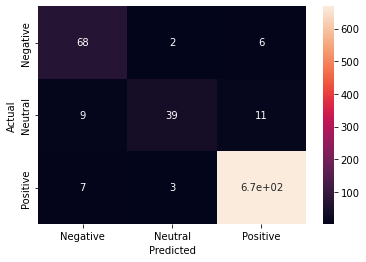

In [62]:
confusion_matrix = pd.crosstab(mlr_balanced['Actual'], mlr_balanced['Predicted'], rownames=['Actual'], colnames=['Predicted'])


sns.heatmap(confusion_matrix, annot=True)
plt.show()

In [63]:
logistic_accuracy = accuracy_score(y_test,logistic_pred)
logistic_precision = precision_score(y_test,logistic_pred,average='macro')
logistic_recall = recall_score(y_test,logistic_pred,average='macro')
logistic_f1 = f1_score(y_test,logistic_pred,average='macro')

In [64]:
negative= mlr_balanced['Predicted'].value_counts()['Negative']
positive= mlr_balanced['Predicted'].value_counts()['Positive']

# Model Metrics

In [65]:
model_metrics = {'Model': ['Multinomial Naive Bayes','Decision Tree', 'Support Vector Machine', 'Multinomial Logistic Regression'], 'Accuracy Score':[naive_accuracy,tree_accuracy,svc_accuracy,logistic_accuracy],'Precision':[naive_precision, tree_precision, svc_precision, logistic_precision],'Recall':[naive_recall,tree_recall,svc_recall,logistic_recall],'F1 Score':[naive_f1,tree_f1,svc_f1,logistic_f1]}

model_metrics = pd.DataFrame(data= model_metrics)
model_metrics

,Model,Accuracy Score,Precision,Recall,F1 Score
0,Multinomial Naive Bayes,0.953260,0.866631,0.900052,0.882143
1,Decision Tree,0.947109,0.915147,0.831494,0.868534
2,Support Vector Machine,0.954490,0.910051,0.855179,0.879161
3,Multinomial Logistic Regression,0.953260,0.890357,0.847002,0.862491


In [66]:
print(classification_report(y_test, naive_pred, target_names=['Positive', 'Negative', 'Neutral']))


              precision    recall  f1-score   support

    Positive       0.87      0.99      0.93        76
    Negative       0.75      0.75      0.75        59
     Neutral       0.98      0.97      0.97       678

    accuracy                           0.95       813
   macro avg       0.87      0.90      0.88       813
weighted avg       0.95      0.95      0.95       813

